# Libraries and Imports

In [1]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.metrics import *
from tensorflow.keras import Input
from tensorflow.keras import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import time

# Shape Classification

# Data and Preprocessing

In [47]:
df = pd.read_csv('./UAFSImageData/data.csv')
Xpaths = df.iloc[0:50000,0:1]
Y = df.iloc[0:50000,1:2]
encoder = OneHotEncoder(sparse=False)
Y = encoder.fit_transform(Y)
X = []


for path in Xpaths['Files']:
    img = cv2.imread('UAFSImageData/' + path,0)/255.0
    img = cv2.resize(img,(60,40))
    X.append(img)
X = np.asarray(X)
X = X.reshape( len(X), 40, 60, 1)

In [48]:
# old random state = 47
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

# Model 1

In [49]:
model = Sequential()

model.add(Input(shape = (40,60,1), dtype="float32"))

model.add(Conv2D(16,kernel_size=(5,5), strides=3, use_bias=True, activation='relu'))

model.add(MaxPooling2D(pool_size=(3,3), strides=2))

model.add(Conv2D(16,kernel_size=(1,1), strides=1, use_bias=True, activation='relu'))
model.add(Conv2D(32,kernel_size=(1,1), strides=1, use_bias=True, activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3), strides=1, use_bias=True, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=1))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(3, activation='linear'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 12, 19, 16)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 9, 16)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 5, 9, 16)          272       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 5, 9, 32)          544       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 3, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 6, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 384)              

In [50]:
model.compile( optimizer="adam" , loss="mse", metrics=['accuracy'])

# Training

In [51]:
pre = time.time()
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)
post = time.time()

Epoch 1/10
563/563 [==============================] - 4s 7ms/step - loss: 0.1532 - accuracy: 0.6526 - val_loss: 0.0980 - val_accuracy: 0.8160
Epoch 2/10
563/563 [==============================] - 3s 6ms/step - loss: 0.0666 - accuracy: 0.8921 - val_loss: 0.0633 - val_accuracy: 0.8867
Epoch 3/10
563/563 [==============================] - 3s 6ms/step - loss: 0.0486 - accuracy: 0.9251 - val_loss: 0.0413 - val_accuracy: 0.9337
Epoch 4/10
563/563 [==============================] - 3s 6ms/step - loss: 0.0388 - accuracy: 0.9439 - val_loss: 0.0486 - val_accuracy: 0.9317
Epoch 5/10
563/563 [==============================] - 3s 6ms/step - loss: 0.0328 - accuracy: 0.9539 - val_loss: 0.0297 - val_accuracy: 0.9663
Epoch 6/10
563/563 [==============================] - 3s 6ms/step - loss: 0.0309 - accuracy: 0.9575 - val_loss: 0.0250 - val_accuracy: 0.9720
Epoch 7/10
563/563 [==============================] - 3s 6ms/step - loss: 0.0256 - accuracy: 0.9671 - val_loss: 0.0243 - val_accuracy: 0.9700
Epoch 

# Evaluation

In [52]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0136 - accuracy: 0.9862


[0.013551171869039536, 0.9861999750137329]

In [53]:
post-pre

33.86918044090271

# Prediction

In [54]:
labels = ['circle','rectangle','triangle']

circle


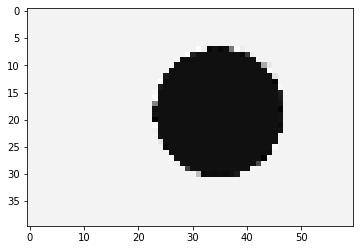

In [56]:
img = x_test[1000]
input_image = np.array(img)
input_image = input_image.reshape(1,40,60,1)
prediction = model.predict(input_image)
argmax = np.argmax(prediction)
print(labels[argmax])
plt.imshow(img, cmap="gray")

triangle


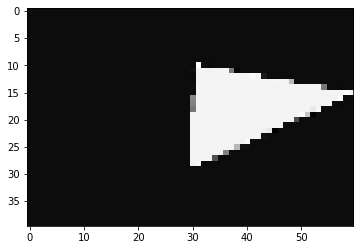

In [57]:
img = x_test[1030]
input_image = np.array(img)
input_image = input_image.reshape(1,40,60,1)
prediction = model.predict(input_image)
argmax = np.argmax(prediction)
print(labels[argmax])
plt.imshow(img, cmap="gray")

circle


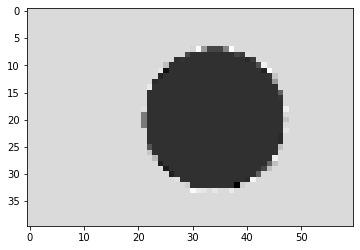

In [58]:
img = x_test[180]
input_image = np.array(img)
input_image = input_image.reshape(1,40,60,1)
prediction = model.predict(input_image)
argmax = np.argmax(prediction)
print(labels[argmax])
plt.imshow(img, cmap="gray")

circle


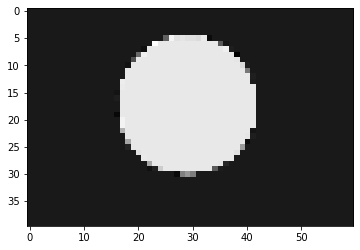

In [59]:
img = x_test[194]
input_image = np.array(img)
input_image = input_image.reshape(1,40,60,1)
prediction = model.predict(input_image)
argmax = np.argmax(prediction)
print(labels[argmax])
plt.imshow(img, cmap="gray")

rectangle


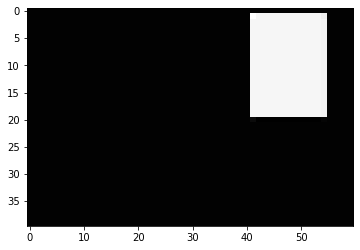

In [60]:
img = x_test[10]
input_image = np.array(img)
input_image = input_image.reshape(1,40,60,1)
prediction = model.predict(input_image)
argmax = np.argmax(prediction)
print(labels[argmax])
plt.imshow(img, cmap="gray")

circle


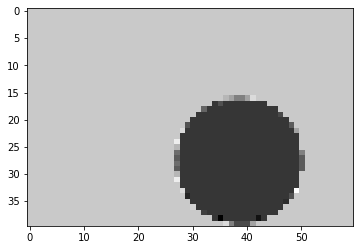

In [61]:
img = x_test[49]
input_image = np.array(img)
input_image = input_image.reshape(1,40,60,1)
prediction = model.predict(input_image)
argmax = np.argmax(prediction)
print(labels[argmax])
plt.imshow(img, cmap="gray")

rectangle


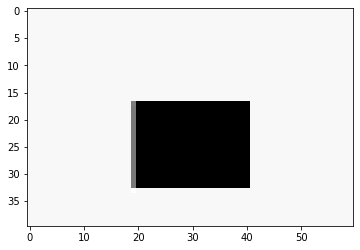

In [62]:
img = x_test[123]
input_image = np.array(img)
input_image = input_image.reshape(1,40,60,1)
prediction = model.predict(input_image)
argmax = np.argmax(prediction)
print(labels[argmax])
plt.imshow(img, cmap="gray")

# Center of Shape

# Data and Preprocessing

In [63]:
df = pd.read_csv('./UAFSImageData/data.csv')
Xpaths = df.iloc[0:50000,0:1]
tuples = df.iloc[0:50000,2:3]

Y = np.empty((50000,2))
for i in range(0, len(tuples)):
    val = tuples['Centers'][i].split(',')
    row = np.empty(2)
    row[0] = int(val[0][1:])/600
    row[1] = int(val[1][1:-1])/400
    Y[i] = row
    
X = []

for path in Xpaths['Files']:
    img = cv2.imread('UAFSImageData/' + path,0)/255.0
    img = cv2.resize(img,(60,40))
    X.append(img)
    
X = np.asarray(X)
X = X.reshape( len(X), 40, 60, 1)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

# Model 2

In [65]:
# model = Sequential()

# model.add(Input(shape = (40,60,1), dtype="float32"))

# model.add(Conv2D(16,kernel_size=(5,5), strides=3, use_bias=True, activation='relu'))

# model.add(MaxPooling2D(pool_size=(3,3), strides=2))

# model.add(Conv2D(16,kernel_size=(1,1), strides=1, use_bias=True, activation='relu'))
# model.add(Conv2D(32,kernel_size=(1,1), strides=1, use_bias=True, activation='relu'))
# model.add(Conv2D(32,kernel_size=(3,3), strides=1, use_bias=True, activation='relu'))

# model.add(MaxPooling2D(pool_size=(3,3), strides=2))

# model.add(Flatten())

# model.add(Dense(64, activation='relu'))

# model.add(Dense(2, activation='linear'))

# model.summary()



model = Sequential()

model.add(Input(shape = (40,60,1), dtype="float32"))

model.add(Conv2D(32,kernel_size=(5,5), strides=3, use_bias=True, activation='relu'))

model.add(MaxPooling2D(pool_size=(3,3), strides=2))

model.add(Conv2D(32,kernel_size=(1,1), strides=1, use_bias=True, activation='relu'))
model.add(Conv2D(64,kernel_size=(1,1), strides=1, use_bias=True, activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3), strides=1, use_bias=True, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=1))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(2, activation='linear'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 12, 19, 32)        832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 9, 32)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 5, 9, 32)          1056      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 5, 9, 64)          2112      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 3, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 6, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 768)              

In [66]:
model.compile( optimizer="adam" , loss="mse", metrics=['accuracy'])

# Training

In [67]:
pre = time.time()

model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

post = time.time()

Epoch 1/5
1125/1125 [==============================] - 8s 6ms/step - loss: 0.0106 - accuracy: 0.8036 - val_loss: 0.0043 - val_accuracy: 0.8907
Epoch 2/5
1125/1125 [==============================] - 7s 6ms/step - loss: 0.0030 - accuracy: 0.9186 - val_loss: 0.0024 - val_accuracy: 0.9222
Epoch 3/5
1125/1125 [==============================] - 7s 6ms/step - loss: 0.0025 - accuracy: 0.9271 - val_loss: 0.0022 - val_accuracy: 0.9400
Epoch 4/5
1125/1125 [==============================] - 7s 6ms/step - loss: 0.0021 - accuracy: 0.9359 - val_loss: 0.0014 - val_accuracy: 0.9457
Epoch 5/5
1125/1125 [==============================] - 7s 6ms/step - loss: 0.0021 - accuracy: 0.9351 - val_loss: 0.0013 - val_accuracy: 0.9455


# Evaluation

In [68]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0013 - accuracy: 0.9503


[0.0013206336880102754, 0.9502999782562256]

In [69]:
post-pre

34.51959991455078

# Prediction

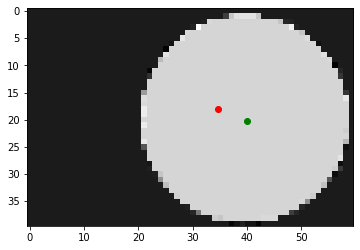

In [81]:
i = 0

img1 = x_test[i]
img2 = img1.reshape(1,40,60,1)
prediction = model.predict(img2)

x = prediction[0][0]*60
y = prediction[0][1]*40

xy = y_test[i][0]*60
yy = y_test[i][1]*40


plt.plot(xy,yy, marker="o", color="green")
plt.plot(x,y, marker="o", color="red")
plt.imshow(img1, cmap="gray")


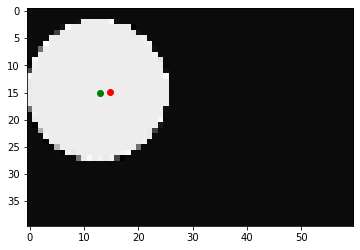

In [82]:
i = 1

img1 = x_test[i]
img2 = img1.reshape(1,40,60,1)
prediction = model.predict(img2)

x = prediction[0][0]*60
y = prediction[0][1]*40

xy = y_test[i][0]*60
yy = y_test[i][1]*40


plt.plot(xy,yy, marker="o", color="green")
plt.plot(x,y, marker="o", color="red")
plt.imshow(img1, cmap="gray")


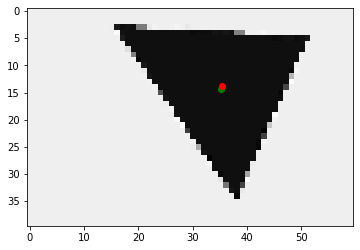

In [83]:
i = 2

img1 = x_test[i]
img2 = img1.reshape(1,40,60,1)
prediction = model.predict(img2)

x = prediction[0][0]*60
y = prediction[0][1]*40

xy = y_test[i][0]*60
yy = y_test[i][1]*40


plt.plot(xy,yy, marker="o", color="green")
plt.plot(x,y, marker="o", color="red")
plt.imshow(img1, cmap="gray")


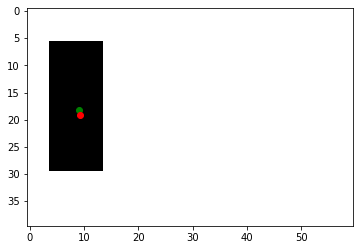

In [84]:
i = 3

img1 = x_test[i]
img2 = img1.reshape(1,40,60,1)
prediction = model.predict(img2)

x = prediction[0][0]*60
y = prediction[0][1]*40

xy = y_test[i][0]*60
yy = y_test[i][1]*40


plt.plot(xy,yy, marker="o", color="green")
plt.plot(x,y, marker="o", color="red")
plt.imshow(img1, cmap="gray")


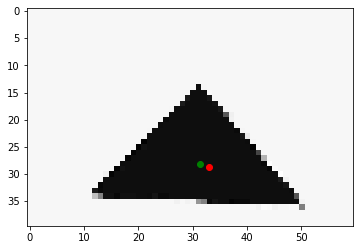

In [85]:
i = 4

img1 = x_test[i]
img2 = img1.reshape(1,40,60,1)
prediction = model.predict(img2)

x = prediction[0][0]*60
y = prediction[0][1]*40

xy = y_test[i][0]*60
yy = y_test[i][1]*40


plt.plot(xy,yy, marker="o", color="green")
plt.plot(x,y, marker="o", color="red")
plt.imshow(img1, cmap="gray")


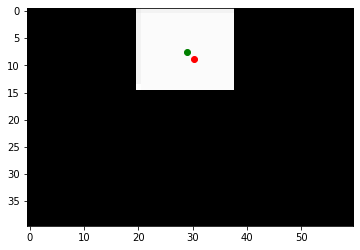

In [86]:
i = 5

img1 = x_test[i]
img2 = img1.reshape(1,40,60,1)
prediction = model.predict(img2)

x = prediction[0][0]*60
y = prediction[0][1]*40

xy = y_test[i][0]*60
yy = y_test[i][1]*40


plt.plot(xy,yy, marker="o", color="green")
plt.plot(x,y, marker="o", color="red")
plt.imshow(img1, cmap="gray")


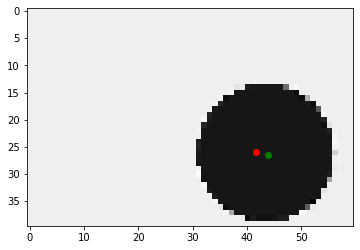

In [87]:
i = 6

img1 = x_test[i]
img2 = img1.reshape(1,40,60,1)
prediction = model.predict(img2)

x = prediction[0][0]*60
y = prediction[0][1]*40

xy = y_test[i][0]*60
yy = y_test[i][1]*40


plt.plot(xy,yy, marker="o", color="green")
plt.plot(x,y, marker="o", color="red")
plt.imshow(img1, cmap="gray")



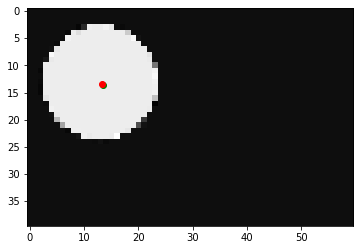

In [88]:
i = 7

img1 = x_test[i]
img2 = img1.reshape(1,40,60,1)
prediction = model.predict(img2)

x = prediction[0][0]*60
y = prediction[0][1]*40

xy = y_test[i][0]*60
yy = y_test[i][1]*40


plt.plot(xy,yy, marker="o", color="green")
plt.plot(x,y, marker="o", color="red")
plt.imshow(img1, cmap="gray")



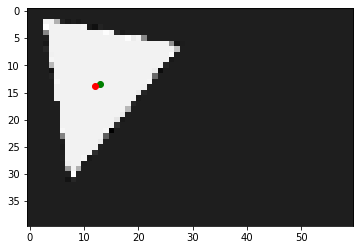

In [89]:
i = 8

img1 = x_test[i]
img2 = img1.reshape(1,40,60,1)
prediction = model.predict(img2)

x = prediction[0][0]*60
y = prediction[0][1]*40

xy = y_test[i][0]*60
yy = y_test[i][1]*40


plt.plot(xy,yy, marker="o", color="green")
plt.plot(x,y, marker="o", color="red")
plt.imshow(img1, cmap="gray")

